# Motion Detection in OpenCV

In [5]:
import cv2
import numpy as np

cap = cv2.VideoCapture('vtest.avi')

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 700:
            continue
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame1, "STATUS : {}".format('MOVEMENT'), (10, 20), cv2.FONT_HERSHEY_DUPLEX,
                    1, (0, 0, 255), 2)
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)

    cv2.imshow('feed', frame1)
    frame1 = frame2
    ret, frame2 = cap.read()

    if cv2.waitKey(40) == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [1]:
# Detect the simple geometric Shape
import numpy as np
import cv2
img = cv2.imread('images.png')
imgGrey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(imgGrey,240,255,cv2.THRESH_BINARY)
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    cv2.drawContours(img,[approx],0,(0,0,0),5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 3:
        cv2.putText(img,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >=0.95 and aspectRatio <= 1.05:
            cv2.putText(img,"Square",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        else:
            cv2.putText(img,"Rectangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx) == 5:
        cv2.putText(img,"Pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx) == 10:
        cv2.putText(img,"Star",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    else:
        cv2.putText(img,"Circle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        


cv2.imshow("shapes",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.2222222222222223
1.0
1.1224489795918366


# Understanding image Histograms using OpenCV Python

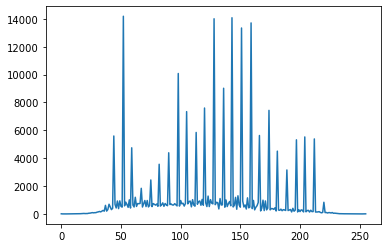

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
img = cv.imread("lena5.jpg",0)
#img = np.zeros((200,200),np.uint8)
#cv.rectangle(img,(0,100),(200,200),(255),-1)
#cv.rectangle(img,(0,50),(100,100),(127),-1)
#b,g,r = cv.split(img)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
#cv.imshow("img",img)
#cv.imshow("b",img)
#cv.imshow("g",img)
#cv.imshow("r",img)
#plt.hist(img.ravel(),256,[0,256])
#plt.hist(b.ravel(),256,[0,256])
#plt.hist(g.ravel(),256,[0,256])
#plt.hist(r.ravel(),256,[0,256])
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

# Template matching using OpenCV in Python

In [18]:
import cv2
import numpy as np
img = cv2.imread("messi5.jpg")
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
template = cv2.imread("messi_face.jpg",0)
w,h = template.shape[::-1]
res = cv2.matchTemplate(grey_img,template,cv2.TM_CCOEFF_NORMED)
print(res)
threshold = 0.9;
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv.rectangle(img,pt,(pt[0] + w, pt[1] + h),(0,0,255),2)
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[-3.4691058e-02 -3.8504876e-02 -4.1045379e-02 ...  8.1209680e-03
   1.5789603e-03 -8.1231780e-03]
 [-4.4115640e-02 -4.6241678e-02 -4.8006508e-02 ...  3.8803015e-03
  -2.1527084e-03 -1.0719364e-02]
 [-5.2004296e-02 -5.3097419e-02 -5.4222222e-02 ...  3.5300276e-05
  -6.1791860e-03 -1.4380161e-02]
 ...
 [ 2.8440318e-01  2.7721754e-01  2.7098694e-01 ... -1.8522652e-02
  -6.9844020e-03  5.3431615e-03]
 [ 2.8858310e-01  2.8193018e-01  2.7942580e-01 ... -3.5477888e-02
  -2.7425934e-02 -1.8955929e-02]
 [ 2.9256245e-01  2.8475472e-01  2.7636874e-01 ... -5.0406363e-02
  -4.4941079e-02 -3.9747603e-02]]
(array([59, 59, 59], dtype=int64), array([200, 201, 202], dtype=int64))


# Hough Line Transform Theory 

In [19]:
import cv2 as cv
import numpy as np

img = cv.imread(cv.samples.findFile('road.jpg'))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)
cv.imshow("Canny Edge", edges)
lines = cv.HoughLines(edges, 1, np.pi / 180, 200)
print(lines)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta) + 1000 * cos(theta))
    y1 = int(y0 + 1000 * a)
    # x1 stores the rounded off value of (r * cos(theta) + 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # x1 stores the rounded off value of (r * sin(theta) - 1000 * cos(theta))
    y2 = int(y0 - 1000 * a)
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv.imshow("Image", img)
cv.waitKey(0)
cv.destroyAllWindows()

[[[170.          1.5707964]]]


In [20]:
import cv2 as cv
import numpy as np

img = cv.imread(cv.samples.findFile('sudoku.png'))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)
cv.imshow("Canny Edge", edges)
lines = cv.HoughLines(edges, 1, np.pi / 180, 200)
print(lines)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta) + 1000 * cos(theta))
    y1 = int(y0 + 1000 * a)
    # x1 stores the rounded off value of (r * cos(theta) + 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # x1 stores the rounded off value of (r * sin(theta) - 1000 * cos(theta))
    y2 = int(y0 - 1000 * a)
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv.imshow("Image", img)
cv.waitKey(0)
cv.destroyAllWindows()

[[[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 4.1200000e+02  1.5707964e+00]]

 [[ 2.1200000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  1.5707964e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 1.6900000e+02  1.5707964e+00]]

 [[ 2.5700000e+02  1.7453292e-02]]

 [[ 2.1200000e+02  1.5707964e+00]]

 [[-3.9300000e+02  3.1066861e+00]]

 [[-4.3600000e+02  3.0892327e+00]]

 [[ 2.6000000e+02  1.7453292e-02]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[ 8.3000000e+01  8.7266460e-02]]

 [[-3.4500000e+02  3.1241393e+00]]

 [[-4.9700000e+02  3.0717795e+00]]

 [[-4.8400000e+02  3.0717795e+00]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[ 7.9000000e+01  8.7266460e-02]]

 [[ 1.7100000e+02  5.2359879e-02]]

 [[ 4.1000000e+02  1.5707964e+00]]

 [[-4.9100000e+02  3.0717795e+00]]

 [[-5.0300000e+02  3.0717795e+00]]

 [[-5.0900000e+02  3.0717795e+00]]

 [[ 3.1100000e+02  1.5707964